# **Submission 03 - Animals - Image Classification (TFLite)**

**Nur Imam Masri**

**Email : nurimammasri.01@gmail.com**

**Username : imammasri**

***Submission Machine Learning Pemula Dicoding***

In [1]:
# import library
import numpy as np
import os
import zipfile
import shutil

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

**Download dataset from Kaggle**

In [2]:
# install kaggle package
!pip install -q kaggle

In [3]:
# upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nurimammasri","key":"aa6be91aaeb839f511b75506e2b6ec89"}'}

In [4]:
# make directory and change permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [5]:
# test kaggle dataset list
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              234KB  2021-07-24 09:20:05           9819  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           6045  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2235  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2491  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Wo

In [6]:
# download dataset, choose 'copy api command' from kaggle dataset
!kaggle datasets download -d madisona/translated-animals10

100% 585M/586M [00:05<00:00, 97.7MB/s]
100% 586M/586M [00:05<00:00, 108MB/s] 


In [7]:
# unzip
!mkdir animals
!unzip -q translated-animals10.zip -d animals
!ls animals

animals10


In [8]:
listdir_image = os.listdir('animals/animals10/raw-img')
print(listdir_image)

['cat', 'elephant', 'butterfly', 'horse', 'dog', 'squirrel', 'cow', 'sheep', 'spider', 'chicken']


In [9]:
# check a lot of data for paper, rock and scissors
dir_image = 'animals/animals10/raw-img'

for  item in listdir_image:
  class_dir = os.path.join(dir_image,item)
  print(item ," : ",len(os.listdir(class_dir)))

cat  :  1668
elephant  :  1446
butterfly  :  2112
horse  :  2623
dog  :  4863
squirrel  :  1862
cow  :  1866
sheep  :  1820
spider  :  4821
chicken  :  3098


In [10]:
# delete dir that is not used
import shutil

list_category = ['dog', 'spider', 'chicken', 'butterfly']

for x in listdir_image:
  if x not in list_category:
    path = os.path.join(dir_image, x)
    if os.path.isfile(path):
        os.remove(path)
    elif os.path.isdir(path):
        shutil.rmtree(path)
    else:
        print("Unknown or already remove!")

listdir_image = os.listdir(dir_image)
listdir_image

['butterfly', 'dog', 'spider', 'chicken']

In [11]:
# check image (count, size, total)
from PIL import Image
total = 0

for x in listdir_image:
  dir = os.path.join(dir_image, x)
  y = len(os.listdir(dir))
  print(x+':', y)
  total = total + y
  
  size = (0,0)
  img_name = os.listdir(dir)
  for i in range(5):
    img_path = os.path.join(dir, img_name[i])
    img = Image.open(img_path)
    
    if size == img.size:
      continue
    else :
      size = img.size
      print('+ size = ',img.size)

print('\nTotal :', total)

butterfly: 2112
+ size =  (300, 200)
+ size =  (300, 225)
+ size =  (300, 200)
+ size =  (300, 300)
+ size =  (640, 426)
dog: 4863
+ size =  (300, 221)
+ size =  (269, 300)
+ size =  (300, 200)
+ size =  (234, 300)
+ size =  (300, 201)
spider: 4821
+ size =  (285, 300)
+ size =  (300, 200)
+ size =  (300, 210)
+ size =  (300, 242)
+ size =  (300, 300)
chicken: 3098
+ size =  (300, 238)
+ size =  (169, 300)
+ size =  (300, 169)

Total : 14894


butterfly


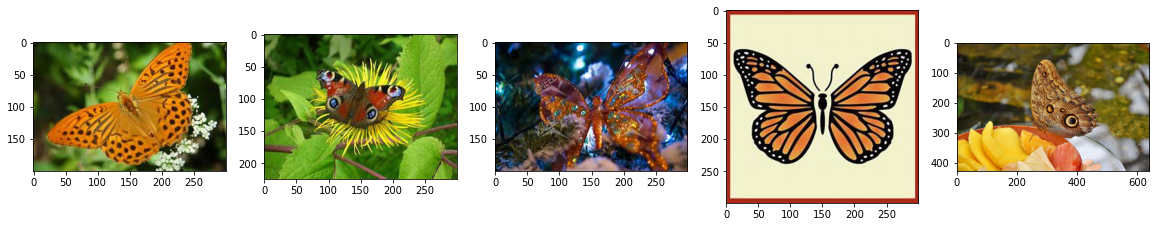

dog


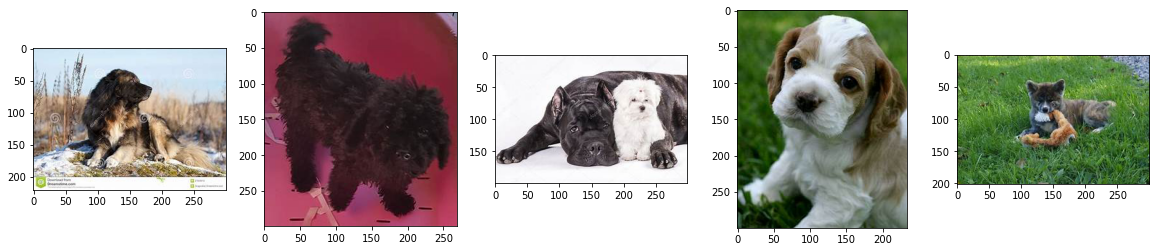

spider


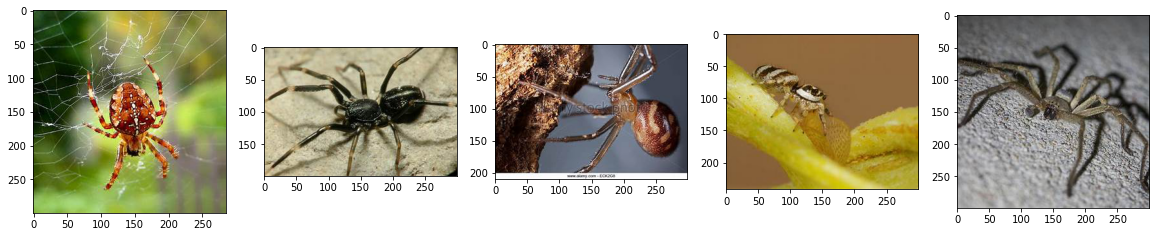

chicken


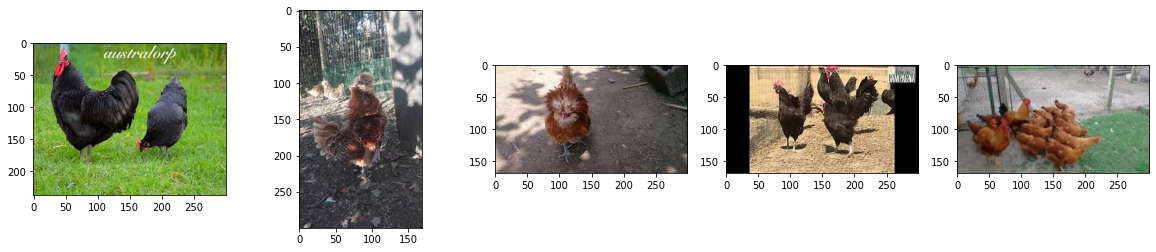

In [12]:
# check images class
for  item in listdir_image:
  print(item)
  class_dir = os.path.join(dir_image,item)
  class_images = os.listdir(class_dir)
  plt.figure(figsize=(20, 4))
  for i, img_path in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.imshow(img)
  plt.show()

In [13]:
# import library for Machine Learning
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D

In [14]:
# make imagedatagenerator

train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2   
)

In [15]:
batch_size = 128
train_generator = train_datagen.flow_from_directory(
    dir_image,
    target_size =(150,150),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dir_image,
    target_size = (150,150),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset='validation'
)

Found 11917 images belonging to 4 classes.
Found 2977 images belonging to 4 classes.


In [16]:
train_generator.class_indices

{'butterfly': 0, 'chicken': 1, 'dog': 2, 'spider': 3}

In [17]:
validation_generator.class_indices

{'butterfly': 0, 'chicken': 1, 'dog': 2, 'spider': 3}

In [18]:
# import tensorflow as tf
# # from tensorflow.keras import applications, optimizers

# tf.device('/device:GPU:0')

# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
#     tf.keras.layers.MaxPooling2D(2, 2),

#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),

#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),

#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
    
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dropout(0.5), 
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dense(4, activation='softmax')
# ])

In [19]:
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet152V2

tf.device('/device:GPU:0')

model = tf.keras.models.Sequential([
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')  
])
model.layers[0].trainable = False

234553344/234545216 [==============================] - 1s 0us/step


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 5, 5, 2048)        58331648  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               26214912  
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 1028      
Total params: 84,678,916
Trainable params: 26,347,268
Non-trainable params: 58,331,648
___________________________________

In [21]:
# model.compile(loss = 'categorical_crossentropy',
#               optimizer = 'adam',
#               metrics=['accuracy'])

In [22]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'RMSprop',
              metrics=['accuracy'])

In [23]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95 and logs.get('val_accuracy')>0.95):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 95%!")
callbacks = myCallback()

In [ ]:
# fitting model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    verbose = 1,
    callbacks=[callbacks]
)

Epoch 1/50
93/93 [==============================] - 153s 1s/step - loss: 4.2217 - accuracy: 0.8555 - val_loss: 0.3959 - val_accuracy: 0.9147
Epoch 2/50
93/93 [==============================] - 111s 1s/step - loss: 0.3948 - accuracy: 0.9003 - val_loss: 0.2473 - val_accuracy: 0.9348
Epoch 3/50
93/93 [==============================] - ETA: 0s - loss: 0.3148 - accuracy: 0.9162

In [ ]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy: (test)', score_valid[1])

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Saving puppy-410265.jpg to puppy-410265.jpg
Spider


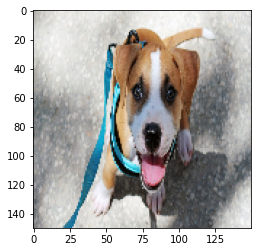

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=batch_size)
  
  if classes[0,0] == 1.0:
    print('Butterfly')
  elif classes[0,1] == 1.0:
    print('Chicken')
  elif classes[0,2] == 1.0:
    print('Dog')
  else:
    print('Spider')

In [ ]:
classes

array([[0., 0., 0., 1.]], dtype=float32)

Safe Model to TF Lite

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TF Lite model.
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /tmp/tmp8ylyifak/assets


In [ ]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('my_model.pb') 
%cd

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: my_model.pb/assets


INFO:tensorflow:Assets written to: my_model.pb/assets


/root
